## Download Additional Libraries

In [ ]:
pip install missingno --quiet

In [ ]:
# Installations
!pip install scikit-plot

## Import Libraries

In [ ]:
#Import Libraris
from tqdm import tqdm #helps us in visualizing the completion of the loop
import numpy as np # linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Code to save figures as High-res PNG

import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/ages_dataset.csv')

## Initial EDA

In [ ]:
df.head()

,Id,Name,Short_description,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Associated_Countries,Associated_Country_Coordinates(Lat/Lon),Associated_Country_Life_Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [ ]:
df.shape

(1048575, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Id                                       1048575 non-null  object 
 1   Name                                     1048575 non-null  object 
 2   Short_description                        999356 non-null   object 
 3   Gender                                   942856 non-null   object 
 4   Country                                  823051 non-null   object 
 5   Occupation                               916209 non-null   object 
 6   Birth_year                               1048575 non-null  int64  
 7   Death_year                               1048574 non-null  float64
 8   Manner_of_death                          52302 non-null    object 
 9   Age_of_death                             1048574 non-null  float64
 10  Associated_Countri

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_year,1048575.0,1845.704993,154.090782,-2700.0,1832.0,1889.0,1919.0,2012.0
Death_year,1048574.0,1915.128392,157.793800,-2659.0,1899.0,1958.0,1996.0,2021.0
Age_of_death,1048574.0,69.423538,16.585482,0.0,60.0,72.0,82.0,169.0


In [ ]:
df.head()

,Id,Name,Short_description,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Associated_Countries,Associated_Country_Coordinates(Lat/Lon),Associated_Country_Life_Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [ ]:
df.columns

Index(['Id', 'Name', 'Short_description', 'Gender', 'Country', 'Occupation',
       'Birth_year', 'Death_year', 'Manner_of_death', 'Age_of_death',
       'Associated_Countries', 'Associated_Country_Coordinates(Lat/Lon)',
       'Associated_Country_Life_Expectancy'],
      dtype='object')

In [ ]:
df.sample(5).T

,57648,828673,449781,200006,416145
Id,Q361358,Q16527252,Q5298299,Q1683584,Q4867957
Name,Adolf Eichholz,Antonella Russo,Dorothy B. Blaney,Jaromír Kopecký,Bass Reeves
Short_description,"deutscher Humanist, Jurist und Rektor der Univ...",studentessa italiana,American philatelist,embassador,American lawman
Gender,Male,Female,Female,NaN,Male
Country,Germany,Italy,NaN,NaN,United States of America
Occupation,NaN,NaN,Philatelist,Politician,Police officer
Birth_year,1490,1984,1921,1899,1838
Death_year,1563.0,2007.0,1998.0,1977.0,1910.0
Manner_of_death,NaN,NaN,NaN,NaN,natural causes
Age_of_death,73.0,23.0,77.0,78.0,72.0


In [ ]:
df.isnull().sum()

Id                                              0
Name                                            0
Short_description                           49219
Gender                                     105719
Country                                    225524
Occupation                                 132366
Birth_year                                      0
Death_year                                      1
Manner_of_death                            996273
Age_of_death                                    1
Associated_Countries                       257005
Associated_Country_Coordinates(Lat/Lon)    257005
Associated_Country_Life_Expectancy         257228
dtype: int64

## Visualization

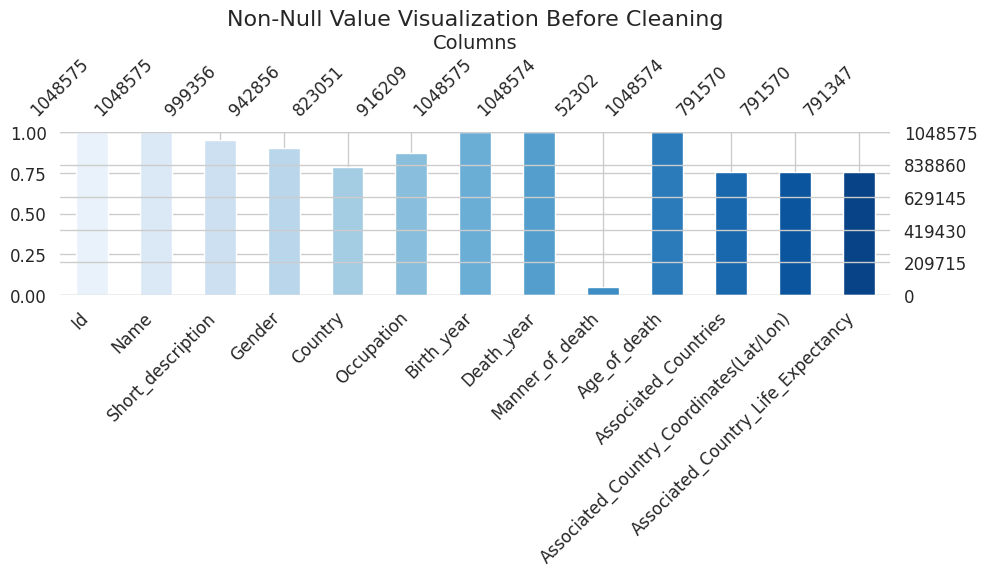

In [ ]:
# Visualize Null Values Before Cleaning
sns.set(style='whitegrid', font_scale=1.2)

#Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning
msno.bar(df, color=sns.color_palette('Blues', n_colors=len(df.columns)), figsize=(10, 6), fontsize=12, labels=True)

plt.title('Non-Null Value Visualization Before Cleaning', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# For Visualization Purposes:
# Lets Drop rows with null values in 'occupation', 'associated_countries', and 'death_year'
df = df.dropna(subset=['Occupation', 'Associated_Countries', 'Death_year'], how='any')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731130 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Id                                       731130 non-null  object 
 1   Name                                     731130 non-null  object 
 2   Short_description                        727536 non-null  object 
 3   Gender                                   671531 non-null  object 
 4   Country                                  731130 non-null  object 
 5   Occupation                               731130 non-null  object 
 6   Birth_year                               731130 non-null  int64  
 7   Death_year                               731130 non-null  float64
 8   Manner_of_death                          44153 non-null   object 
 9   Age_of_death                             731130 non-null  float64
 10  Associated_Countries           

In [ ]:
# Summary for all object datatypes
df.describe(include='object')

,Id,Name,Short_description,Gender,Country,Occupation,Manner_of_death,Associated_Countries,Associated_Country_Coordinates(Lat/Lon),Associated_Country_Life_Expectancy
count,731130,731130,727536,671531,731130,731130,44153,731130,731130,730917
unique,731125,690001,315061,17,4594,7318,162,1791,1791,1521
top,Q23648966,John Smith,American politician,Male,United States of America,Artist,natural causes,['United States'],"[(37.09024, -95.712891)]",[78.5]
freq,2,65,12848,607055,140085,205393,30141,140516,140516,140809


In [ ]:
# Check all unique values per feature
df.nunique()

Id                                         731125
Name                                       690001
Short_description                          315061
Gender                                         17
Country                                      4594
Occupation                                   7318
Birth_year                                   1383
Death_year                                   1443
Manner_of_death                               162
Age_of_death                                   91
Associated_Countries                         1791
Associated_Country_Coordinates(Lat/Lon)      1791
Associated_Country_Life_Expectancy           1521
dtype: int64

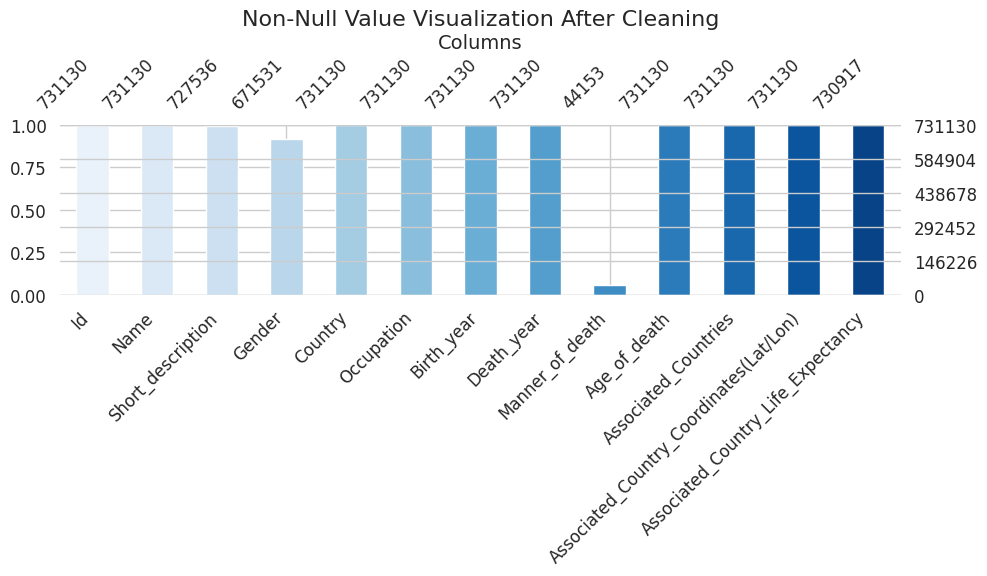

In [ ]:
# Visualize Null Values After Cleaning
sns.set(style='whitegrid', font_scale=1.2)
msno.bar(df, color=sns.color_palette('Blues', n_colors=len(df.columns)), figsize=(10, 6), fontsize=12, labels=True)

plt.title('Non-Null Value Visualization After Cleaning', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Count null values per feature
df.isna().sum()

Id                                              0
Name                                            0
Short_description                            3594
Gender                                      59599
Country                                         0
Occupation                                      0
Birth_year                                      0
Death_year                                      0
Manner_of_death                            686977
Age_of_death                                    0
Associated_Countries                            0
Associated_Country_Coordinates(Lat/Lon)         0
Associated_Country_Life_Expectancy            213
dtype: int64

In [ ]:
# Lets Drop rows with null values in 'Manner_0f_Death'
df.dropna(subset=['Manner_of_death'],inplace=True)

In [ ]:
df.shape

(44153, 13)

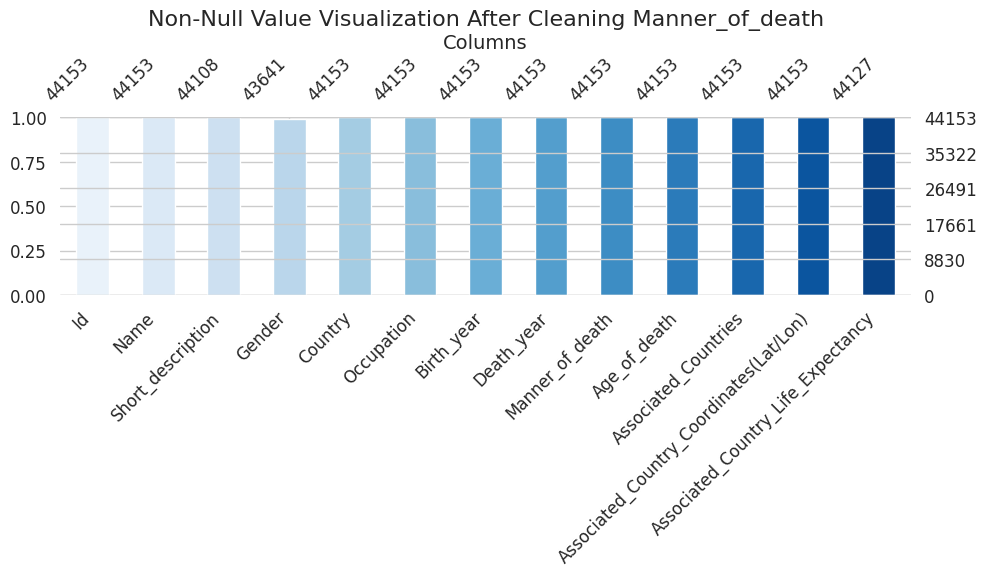

In [ ]:
# Visualize Null Values After Cleaning Manner_of_death
sns.set(style='whitegrid', font_scale=1.2)
msno.bar(df, color=sns.color_palette('Blues', n_colors=len(df.columns)), figsize=(10, 6), fontsize=12, labels=True)

plt.title('Non-Null Value Visualization After Cleaning Manner_of_death', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Summary for all object datatypes
df.describe(include='object')

,Id,Name,Short_description,Gender,Country,Occupation,Manner_of_death,Associated_Countries,Associated_Country_Coordinates(Lat/Lon),Associated_Country_Life_Expectancy
count,44153,44153,44108,43641,44153,44153,44153,44153,44153,44127
unique,44153,43883,27712,7,1314,1509,162,694,694,590
top,Q23,John Smith,American politician,Male,United States of America,Artist,natural causes,['United States'],"[(37.09024, -95.712891)]",[78.5]
freq,1,6,684,36644,16787,17623,30141,16863,16863,16887


In [ ]:
# Check all unique values per feature
df.nunique()

Id                                         44153
Name                                       43883
Short_description                          27712
Gender                                         7
Country                                     1314
Occupation                                  1509
Birth_year                                   729
Death_year                                   701
Manner_of_death                              162
Age_of_death                                  91
Associated_Countries                         694
Associated_Country_Coordinates(Lat/Lon)      694
Associated_Country_Life_Expectancy           590
dtype: int64

## Preprocessing

In [ ]:
processed_df = df.copy()

In [ ]:
# Adding a New Column Called Number of Citizenships depending on number of countries the person was associated with
processed_df['Number of Citizenships'] = processed_df['Country'].apply(lambda x: len(x.split(';')))

In [ ]:
def calculate_average(value):
    try:
        val = eval(value)
    except:
        return np.nan

    return np.mean(val)

In [ ]:
processed_df.head()

,Id,Name,Short_description,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Associated_Countries,Associated_Country_Coordinates(Lat/Lon),Associated_Country_Life_Expectancy,Number of Citizenships
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]",2
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3],1
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5],1
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0,['France'],"[(46.227638, 2.213749)]",[82.5],2
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0,['France'],"[(46.227638, 2.213749)]",[82.5],1


In [ ]:
processed_df.drop('Id',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.drop('Name',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.drop('Short_description',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.drop('Associated_Country_Coordinates(Lat/Lon)',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.drop('Associated_Countries',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.drop('Associated_Country_Life_Expectancy',axis=1, inplace=True) # axis=1 means column

In [ ]:
processed_df.head()

,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Number of Citizenships
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,2
1,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,1
2,Male,United States of America,Politician,1809,1865.0,homicide,56.0,1
5,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0,2
7,Male,France,Artist,1840,1926.0,natural causes,86.0,1


In [ ]:
processed_df['Country'].unique()

array(['United States of America; Kingdom of Great Britain',
       'United Kingdom', 'United States of America', ...,
       'Ottoman Empire; Yugoslavia', 'Sweden; South Africa',
       'France; Russia'], dtype=object)

###### Convert String to Array since When you load the CSV the arrays will be saved as strings

In [ ]:
# def convert_string_to_array(value):
#     try:
#         val = eval(value)
#         return val
#     except:
#         return np.nan

In [ ]:
# processed_df["Associated_Countries"] = processed_df["Associated_Countries"].apply(convert_string_to_array)

###### Convert Multi Value Columns into Array Values

In [ ]:
# def break_string_to_array(value):
#     if type(value) == float:
#         return np.nan

#     if ";" in value:
#         arr =value.split(";")
#     else:
#         arr = [value]

#     arr = [x.strip() for x in arr]
#     return arr

In [ ]:
#processed_df['Occupation'] = processed_df['Occupation'].apply(break_string_to_array)

In [ ]:
# processed_df['Manner_of_death'] = processed_df['Manner_of_death'].apply(break_string_to_array)

## Handle Gender Feature

In [ ]:
def get_first_value_only(value):
    if type(value) == float:
        return np.nan

    if ";" in value:
        arr =value.split(";")
    else:
        arr = [value]

    arr = [x.strip() for x in arr]
    return arr[0]

In [ ]:
processed_df['Gender'].unique()

array(['Male', 'Female', 'Transgender Female', nan, 'Intersex',
       'Transgender Male', 'Eunuch; Male', 'Transgender Female; Female'],
      dtype=object)

In [ ]:
processed_df["Gender"] = processed_df["Gender"].apply(get_first_value_only)

In [ ]:
processed_df['Gender'].unique()

array(['Male', 'Female', 'Transgender Female', nan, 'Intersex',
       'Transgender Male', 'Eunuch'], dtype=object)

In [ ]:
# Define a function to categorize the values
def categorize_gender(gender):
    if gender in ['Male', 'Female']:
        return gender
    else:
        return 'Others'

# Apply the function to create a new column
processed_df['Gender'] = processed_df['Gender'].apply(categorize_gender)

# Replace NaN with 'Others' (if needed)
processed_df['Gender'].fillna('Others', inplace=True)

In [ ]:
processed_df['Gender'].unique()

array(['Male', 'Female', 'Others'], dtype=object)

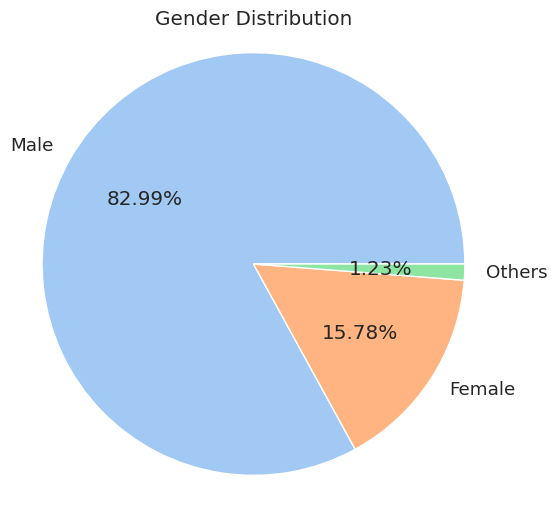

In [ ]:
# Count the occurrences of each gender
gender_counts = processed_df['Gender'].value_counts()

# Combine other genders into "Others"
others_count = gender_counts[~gender_counts.index.isin(['Male', 'Female'])].sum()
gender_counts = gender_counts[gender_counts.index.isin(['Male', 'Female'])]
gender_counts['Others'] = others_count

# Create a pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

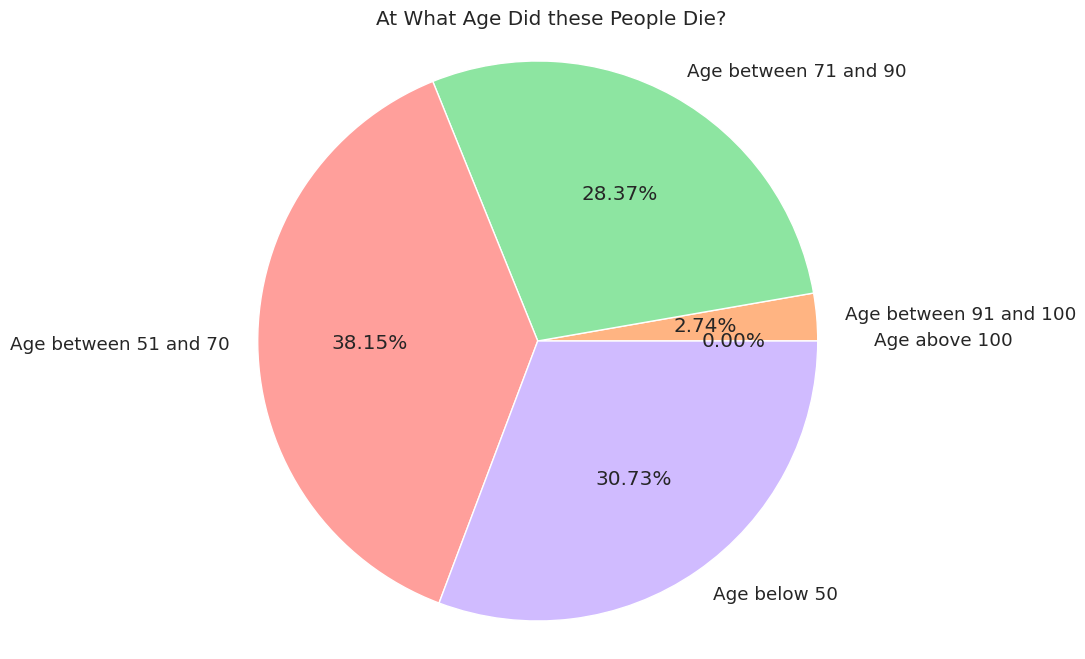

In [ ]:
# Calculate the number of people in each age range
count = [
    processed_df[processed_df['Age_of_death'] > 100].shape[0],
    processed_df[(processed_df['Age_of_death'] <= 100) & (processed_df['Age_of_death'] > 90)].shape[0],
    processed_df[(processed_df['Age_of_death'] <= 90) & (processed_df['Age_of_death'] > 70)].shape[0],
    processed_df[(processed_df['Age_of_death'] <= 70) & (processed_df['Age_of_death'] > 50)].shape[0],
    processed_df.shape[0] - (processed_df[processed_df['Age_of_death'] > 100].shape[0]
                  + processed_df[(processed_df['Age_of_death'] <= 100) & (processed_df['Age_of_death'] > 90)].shape[0]
                  + processed_df[(processed_df['Age_of_death'] <= 70) & (processed_df['Age_of_death'] > 50)].shape[0]
                  + processed_df[(processed_df['Age_of_death'] <= 90) & (df['Age_of_death'] > 70)].shape[0])
]

# Define age ranges for the labels
age_ranges = ['Age above 100', 'Age between 91 and 100', 'Age between 71 and 90', 'Age between 51 and 70', 'Age below 50']

# Define the explode to highlight the first slice (age > 100)
explode = [0.1, 0, 0, 0, 0]

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Create a pie chart using pyplot
plt.figure(figsize=(12, 8))
plt.pie(count, labels=age_ranges, colors=palette_color, explode=explode, autopct='%.2f%%')
plt.title("At What Age Did these People Die?")
plt.axis('equal')

plt.show()

## Handle Target Feature

In [ ]:
processed_df['Manner_of_death'].unique()

array(['natural causes', 'homicide', 'suicide', 'accident',
       'capital punishment', 'death in battle', 'unnatural death',
       'extrajudicial killing', 'homicide; natural causes', 'euthanasia',
       'suicide; natural causes', 'epilepsy', 'complication',
       'summary execution', 'suicide; homicide; accident',
       'suicide; homicide; natural causes',
       'suicide; unfortunate accident',
       'capital punishment; unnatural death', 'gunshot',
       'internal bleeding', 'cardiac arrest; natural causes',
       'capital punishment; homicide', 'accident; natural causes',
       'Pospíšil', 'Category:People executed by firing squad', 'era',
       'homicide; regicide', 'capital punishment; torture',
       'maternal death', 'strain', 'Eastern Front of World War II',
       'sleep apnea', 'suicide attack', 'schizophrenia',
       'homicide; ballistic trauma', 'homicide; death in absentia',
       'patricide', 'scarlet fever', 'homicide; homicide', 'internment',
       'robb

In [ ]:
# Calculate value counts
value_counts = processed_df['Manner_of_death'].value_counts()

# Define a threshold for the minimum frequency
threshold = 50

# Get the categories with frequency less than the threshold
categories_to_replace = value_counts[value_counts < threshold].index

# Replace those categories with 'Others'
processed_df['Manner_of_death'] = processed_df['Manner_of_death'].apply(lambda x: 'Others' if x in categories_to_replace else x)

In [ ]:
processed_df['Manner_of_death'].value_counts()

natural causes        30141
suicide                4439
accident               4336
homicide               2989
capital punishment     1538
Others                  362
unnatural death         217
death in battle         131
Name: Manner_of_death, dtype: int64

## Remove Duplicates

In [ ]:
#Check the shape of the dataframe
print('Shape of the dataset:',processed_df.shape)

#Check for duplicate rows
dup = processed_df[processed_df.duplicated()]
print('Number of duplicate rows:',dup.shape[0])

#Drop duplicates rows
processed_df = processed_df.drop_duplicates()
print('Shape of the dataset after dropping duplicates:',processed_df.shape)

Shape of the dataset: (44153, 8)
Number of duplicate rows: 3609
Shape of the dataset after dropping duplicates: (40544, 8)


## Outliers Detection

In [ ]:
processed_df.head()

,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Number of Citizenships
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,2
1,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,1
2,Male,United States of America,Politician,1809,1865.0,homicide,56.0,1
5,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0,2
7,Male,France,Artist,1840,1926.0,natural causes,86.0,1


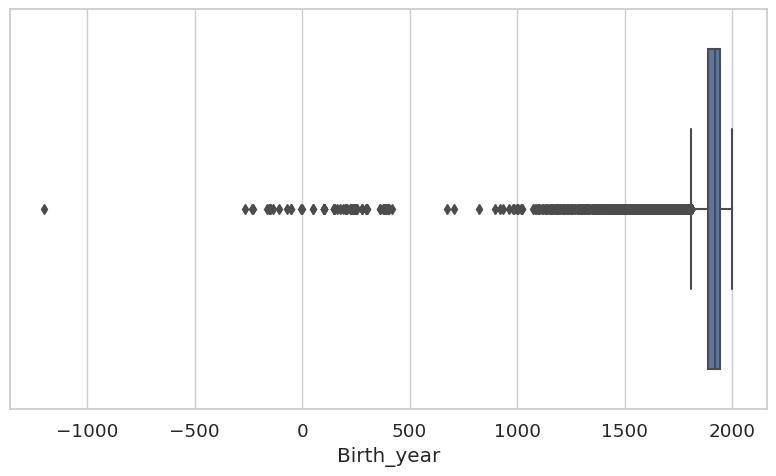

In [ ]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=processed_df['Birth_year'])
plt.xlabel("Birth_year")
save_fig('Outliers-Birth_year')
plt.show()

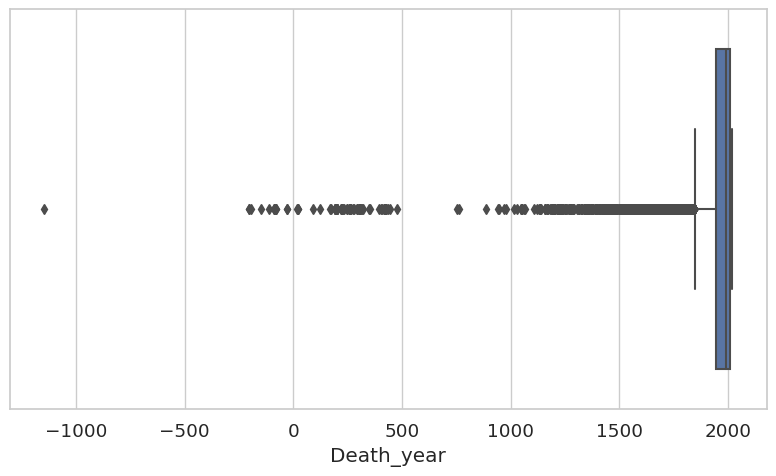

In [ ]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=processed_df['Death_year'])
plt.xlabel("Death_year")
save_fig('Outliers-Death_year')
plt.show()

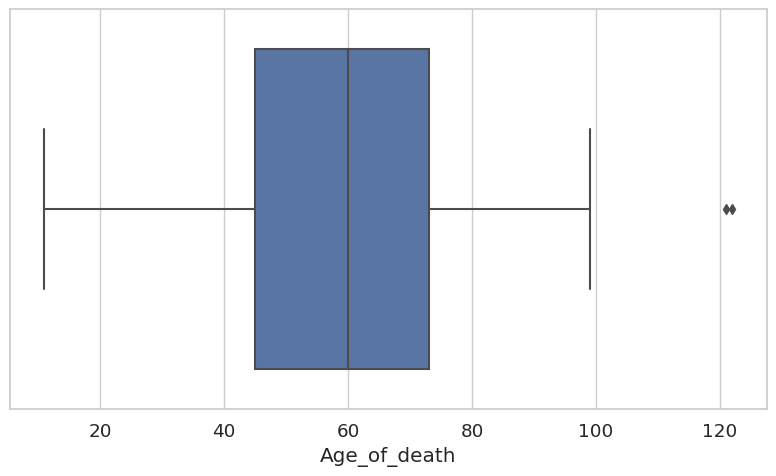

In [ ]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=processed_df['Age_of_death'])
plt.xlabel("Age_of_death")
save_fig('Outliers-Age_of_death')
plt.show()

## Count Outliers

In [ ]:
def count_outliers(dataframe, column_name):
    column_data = dataframe[column_name]

    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = column_data[(column_data<lower_bound) | (column_data>upper_bound)]
    return len(outliers)

In [ ]:
count_outliers(processed_df,'Age_of_death')

2

In [ ]:
count_outliers(processed_df,'Birth_year')

2693

In [ ]:
count_outliers(processed_df,'Death_year')

2266

In [ ]:
attributes = ['Birth_year', 'Death_year', 'Age_of_death', 'Number of Citizenships']

for attribute in attributes:
    count = count_outliers(processed_df, attribute)
    print(attribute)
    print('Number of outliers:',count,'out of',len(processed_df[attribute]))

Birth_year
Number of outliers: 2693 out of 40544
Death_year
Number of outliers: 2266 out of 40544
Age_of_death
Number of outliers: 2 out of 40544
Number of Citizenships
Number of outliers: 5080 out of 40544


## Remove Outliers

In [ ]:
def remove_outliers(dataFrame, column_name):
    column_data = dataFrame[column_name]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_df = dataFrame[(column_data >= lower_bound) & (column_data <= upper_bound)]
    return filtered_df

In [ ]:
#outlier_removed_df = remove_outliers(processed_df,'Birth_year')
#print("Original df:",processed_df.shape)
#print("Df shape after removing outlier:",outlier_removed_df.shape)

In [ ]:
#outlier_removed_df = remove_outliers(processed_df,'Death_year')
#print("Original df:",processed_df.shape)
#print("Df shape after removing outlier:",outlier_removed_df.shape)

In [ ]:
#outlier_removed_df = remove_outliers(processed_df,'Number of Citizenships')
#print("Original df:",processed_df.shape)
#print("Df shape after removing outlier:",outlier_removed_df.shape)

In [ ]:
#processed_df = outlier_removed_df

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
Gender = encoder.fit_transform(processed_df['Gender'])

# Print the encoding values
print("Labels: ",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels:  ['Female' 'Male' 'Others']
Encodings: [0 1 2]


In [ ]:
Occupation = encoder.fit_transform(processed_df['Occupation'])

# Print the encoding values
print("Labels: ",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels:  ['Abbé' 'Abolitionist' 'Academic' ... 'Youtuber' 'Zookeeper'
 'Zookeeper; primatologist']
Encodings: [   0    1    2 ... 1506 1507 1508]


In [ ]:
Country = encoder.fit_transform(processed_df['Country'])

# Print the encoding values
print("Labels: ",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels:  ['Afghanistan'
 'Afghanistan; Kingdom of Afghanistan; Republic of Afghanistan' 'Albania'
 ... 'Zimbabwe' 'Zimbabwe; Rhodesia'
 'Zimbabwe; Rhodesia; Federation of Rhodesia and Nyasaland; Southern Rhodesia; Zimbabwe Rhodesia']
Encodings: [   0    1    2 ... 1311 1312 1313]


In [ ]:
Manner_of_death = encoder.fit_transform(processed_df['Manner_of_death'])

# Print the encoding values
print("Labels: ",encoder.classes_)
print("Encodings:",encoder.transform(encoder.classes_))

Labels:  ['Others' 'accident' 'capital punishment' 'death in battle' 'homicide'
 'natural causes' 'suicide' 'unnatural death']
Encodings: [0 1 2 3 4 5 6 7]


In [ ]:
# Replace encoded lebsl with main df
processed_df['Gender'] = Gender
processed_df['Occupation'] = Occupation
processed_df['Country'] = Country
processed_df['Manner_of_death'] = Manner_of_death

In [ ]:
processed_df.head()

,Gender,Country,Occupation,Birth_year,Death_year,Manner_of_death,Age_of_death,Number of Citizenships
0,1,1210,1041,1732,1799.0,5,67.0,2
1,1,1077,74,1952,2001.0,5,49.0,1
2,1,1133,1041,1809,1865.0,4,56.0,1
5,1,553,442,1790,1832.0,5,42.0,2
7,1,274,74,1840,1926.0,5,86.0,1


## Correlation Matrix

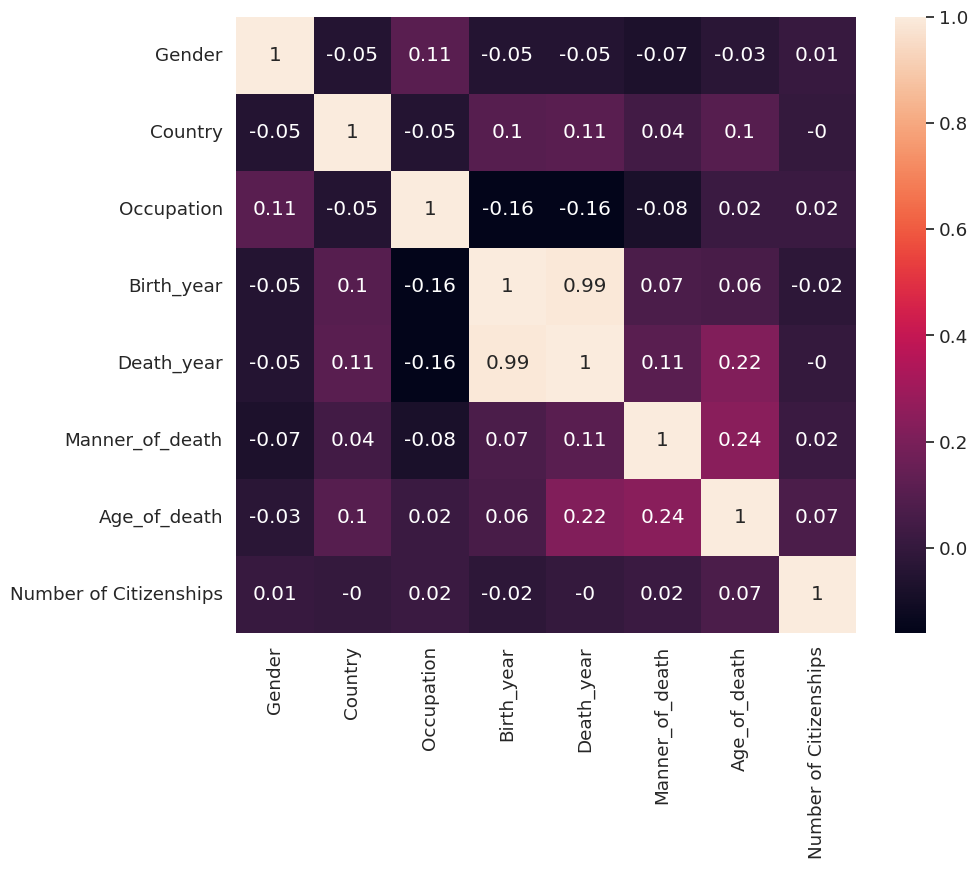

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(processed_df.corr().round(2), annot=True)
plt.show()

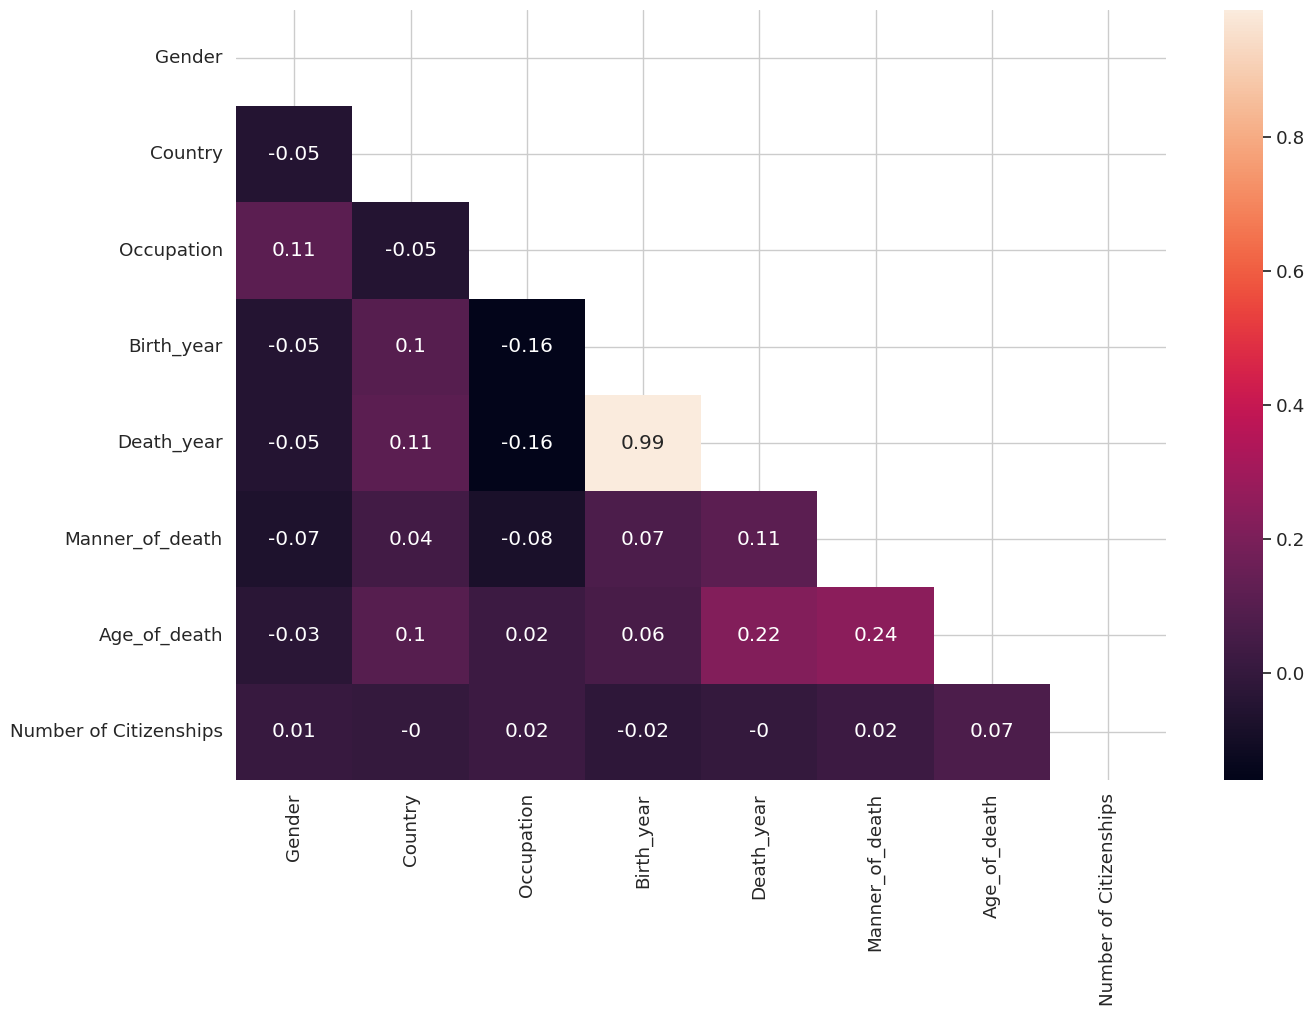

In [ ]:
import seaborn as sns

mask = np.triu(processed_df.corr())
#mask = np.tril(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(processed_df.corr().round(2), annot=True, mask=mask)
plt.show()

## SMOTE

In [ ]:
# Implementing SMOTE (Synthetic Minority Over-sampling Technique)

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate the features and target variable
y = processed_df['Manner_of_death']
x = processed_df.drop(columns = 'Manner_of_death')

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
x_resampled, y_resampled = smote.fit_resample(x, y)

# Replace the original dataframe with the resampled data
processed_df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns),
                pd.Series(y_resampled, name='Manner_of_death')],
               axis=1)

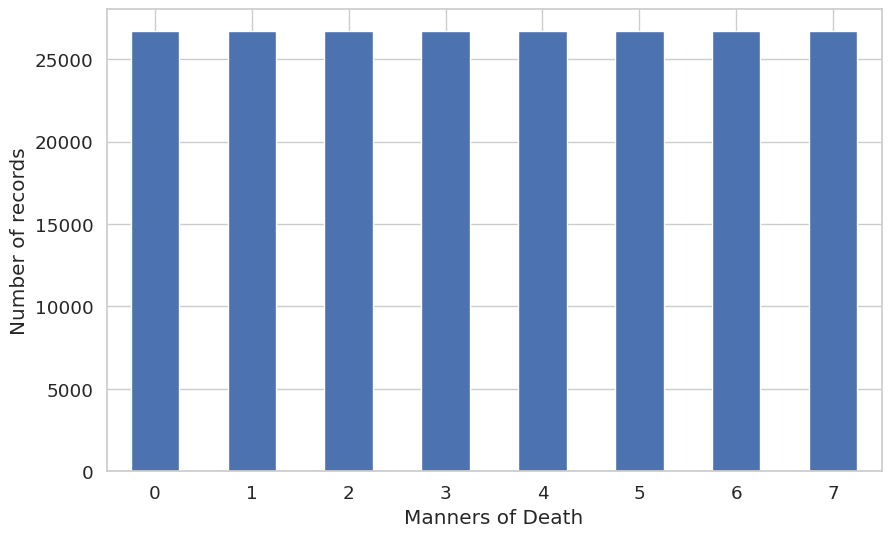

In [ ]:
# See the number of records per class
# visualize obesity_levels value counts after applying SMOTE

# Set the plot fig size
plt.figure(figsize=(10,6))
# Bar plot
processed_df['Manner_of_death'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Manners of Death")
plt.ylabel("Number of records")
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
target_column = processed_df['Manner_of_death']

processed_df.loc[:, processed_df.columns != 'Manner_of_death'] = scaler.fit_transform(processed_df.loc[:, processed_df.columns != 'Manner_of_death'])

processed_df['Manner_of_death'] = target_column

In [ ]:
processed_df.head()

,Gender,Country,Occupation,Birth_year,Death_year,Age_of_death,Number of Citizenships,Manner_of_death
0,0.429903,1.333779,0.925853,-0.867578,-0.749252,1.211484,1.965963,5
1,0.429903,0.974924,-1.187797,0.471939,0.476745,0.089132,-0.359584,5
2,0.429903,1.126021,0.925853,-0.398747,-0.348679,0.525602,-0.359584,4
3,0.429903,-0.438914,-0.383430,-0.514433,-0.548965,-0.347339,1.965963,5
4,0.429903,-1.191701,-1.187797,-0.209997,0.021548,2.396190,-0.359584,5


## Dataset Split

In [ ]:
from sklearn.model_selection import train_test_split

y = processed_df['Manner_of_death']
x = processed_df.drop(columns = 'Manner_of_death')
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170892, 7)
(42724, 7)
(170892,)
(42724,)


## Model Training

### KNN

Test Accuracy:  0.745178354086696
Train Accuracy:  0.8256091566603468
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      5340
           1       0.59      0.63      0.61      5340
           2       0.78      0.82      0.80      5341
           3       0.92      0.98      0.95      5341
           4       0.68      0.68      0.68      5341
           5       0.67      0.49      0.57      5340
           6       0.64      0.53      0.58      5341
           7       0.88      0.95      0.92      5340

    accuracy                           0.75     42724
   macro avg       0.74      0.75      0.74     42724
weighted avg       0.74      0.75      0.74     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

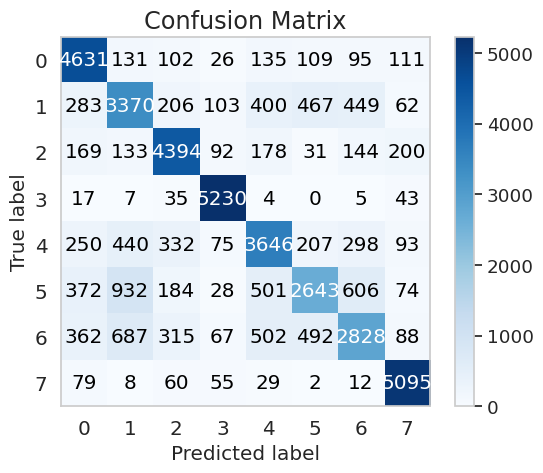

In [ ]:
#KNN
#Step-1 : Import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Step-2 : Create an instance or object of the model
knn = KNeighborsClassifier(n_neighbors = 5)

#Step-3: Fit the model with train set
knn.fit(x_train, y_train)

#Step-4 : Test the model
y_pred_knn = knn.predict(x_test)

#Step-5 : Evaluate the model
from sklearn.metrics import accuracy_score

print("Test Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Train Accuracy: ",accuracy_score(y_train, knn.predict(x_train)))

#See classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)

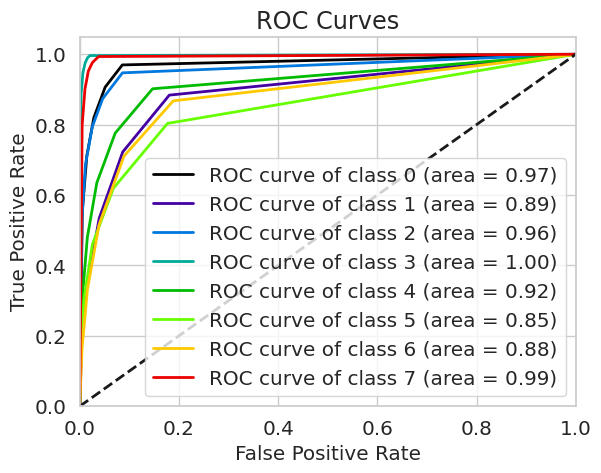

AUC Score: 0.9319767368347106


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': randint(1, 50),         # Number of neighbors to consider
    'weights': ['uniform', 'distance'],    # Weighting type
    'p': [1, 2],                           # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   verbose=3,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

# 4m 7s

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Best Estimator:  KNeighborsClassifier(n_neighbors=2, weights='distance')
Best Score:  0.7788603335839184


Test Accuracy:  0.7888306338357831
Train Accuracy:  0.9972029117805398
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5340
           1       0.66      0.67      0.67      5340
           2       0.85      0.85      0.85      5341
           3       0.96      0.98      0.97      5341
           4       0.74      0.75      0.74      5341
           5       0.63      0.54      0.58      5340
           6       0.65      0.67      0.66      5341
           7       0.92      0.96      0.94      5340

    accuracy                           0.79     42724
   macro avg       0.79      0.79      0.79     42724
weighted avg       0.79      0.79      0.79     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

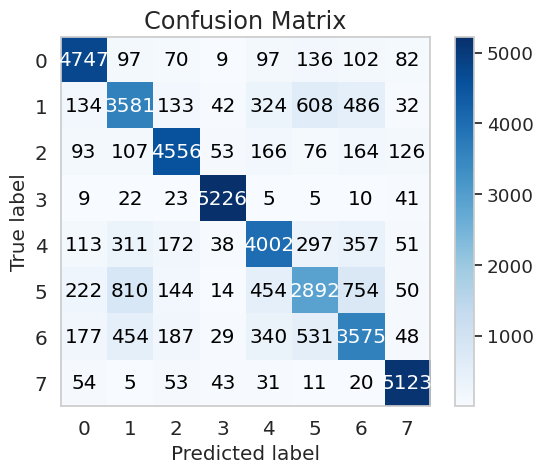

In [ ]:
#Step-1 : Import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Step-2 : Create an instance or object of the model
knn = random_search.best_estimator_

#Step-3: Fit the model with train set
knn.fit(x_train, y_train)

#Step-4 : Test the model
y_pred_knn = knn.predict(x_test)

#Step-5 : Evaluate the model
from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Train Accuracy: ",accuracy_score(y_train, knn.predict(x_train)))

#See classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)

#28s

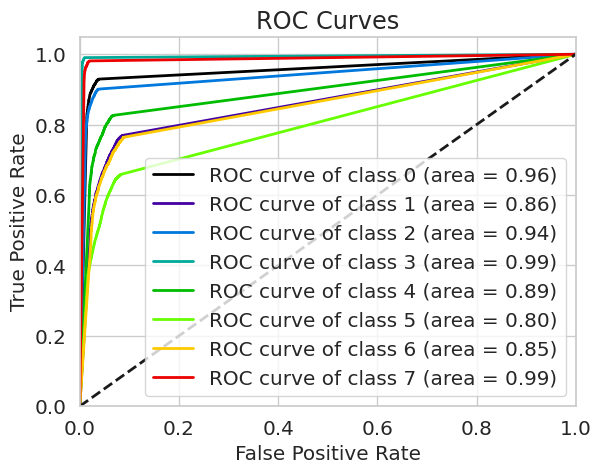

AUC Score: 0.9100387237638453


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],          # Weighting type
    'p': [1, 2],                                 # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn,
                           param_grid=param_grid,
                           cv=5,
                           verbose=3,
                           n_jobs=-1)


# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

#17min

Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best Parameters:  {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Estimator:  KNeighborsClassifier(n_neighbors=1, p=1)
Best Score:  0.7953093040847513


Test Accuracy:  0.805168055425522
Train Accuracy:  0.9972029117805398
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5340
           1       0.69      0.69      0.69      5340
           2       0.87      0.87      0.87      5341
           3       0.96      0.98      0.97      5341
           4       0.76      0.77      0.77      5341
           5       0.65      0.56      0.60      5340
           6       0.68      0.70      0.69      5341
           7       0.93      0.97      0.95      5340

    accuracy                           0.81     42724
   macro avg       0.80      0.81      0.80     42724
weighted avg       0.80      0.81      0.80     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

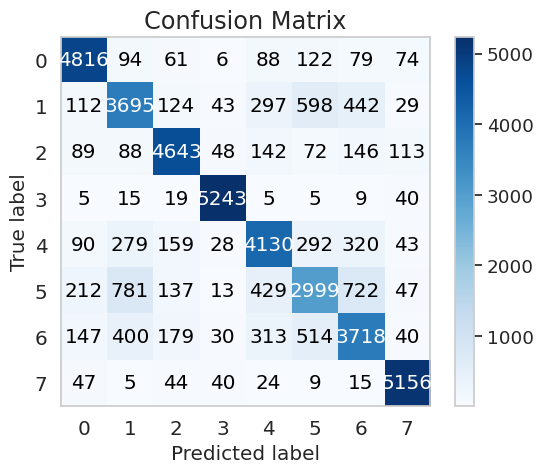

In [ ]:
#Step-1 : Import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Step-2 : Create an instance or object of the model
knn = grid_search.best_estimator_

#Step-3: Fit the model with train set
knn.fit(x_train, y_train)

#Step-4 : Test the model
y_pred_knn = knn.predict(x_test)

#Step-5 : Evaluate the model
from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(y_test,y_pred_knn))
print("Train Accuracy: ",accuracy_score(y_train, knn.predict(x_train)))

#See classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)

#29s

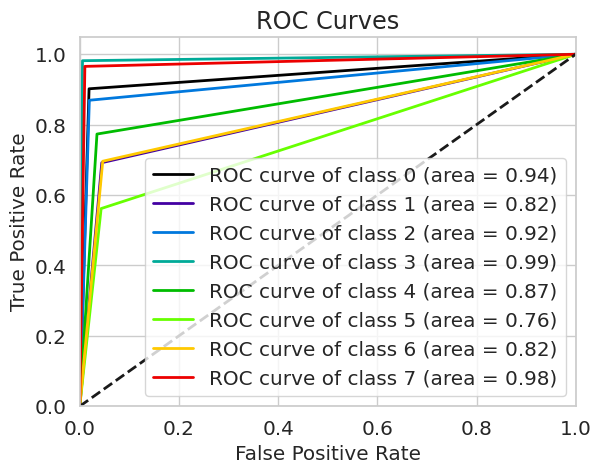

AUC Score: 0.8886661269128677


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## DecisionTree Classifier

Test Accuracy  0.7933480011234904
Train Accuracy  0.9972029117805398
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      5340
           1       0.66      0.67      0.66      5340
           2       0.85      0.85      0.85      5341
           3       0.96      0.97      0.96      5341
           4       0.74      0.74      0.74      5341
           5       0.66      0.62      0.64      5340
           6       0.66      0.66      0.66      5341
           7       0.94      0.96      0.95      5340

    accuracy                           0.79     42724
   macro avg       0.79      0.79      0.79     42724
weighted avg       0.79      0.79      0.79     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

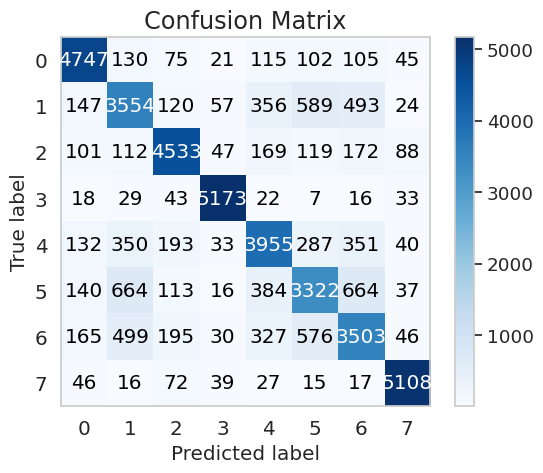

In [ ]:
# Train model with default parameters
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Make prediction
y_pred_dt = dt.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_dt))
print('Train Accuracy ', accuracy_score(y_train, dt.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_dt))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt)

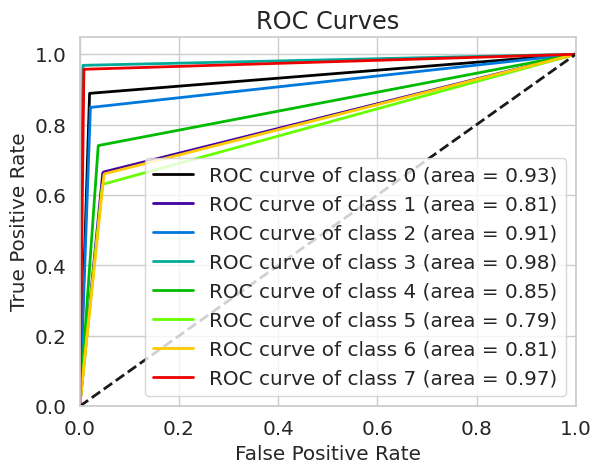

AUC Score: 0.8827923271667159


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],             # Split criterion
    'max_depth': randint(1, 20),                  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),         # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 20),          # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider at each split
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(decision_tree,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   verbose=3,
                                   n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 19}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=7,
                       min_samples_split=19)
Best Score:  0.6801956393906694


Test Accuracy  0.6879739724744874
Train Accuracy  0.7368103831659761
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      5340
           1       0.55      0.50      0.52      5340
           2       0.73      0.75      0.74      5341
           3       0.88      0.95      0.91      5341
           4       0.57      0.61      0.59      5341
           5       0.63      0.59      0.61      5340
           6       0.53      0.44      0.48      5341
           7       0.82      0.93      0.87      5340

    accuracy                           0.69     42724
   macro avg       0.68      0.69      0.68     42724
weighted avg       0.68      0.69      0.68     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

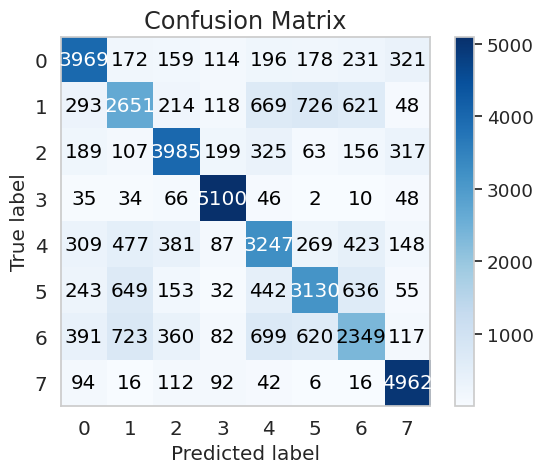

In [ ]:
# Train model with optimized parameters
from sklearn.tree import DecisionTreeClassifier

dt = random_search.best_estimator_
dt.fit(x_train, y_train)

# Make prediction
y_pred_dt = dt.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_dt))
print('Train Accuracy ', accuracy_score(y_train, dt.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_dt))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt)

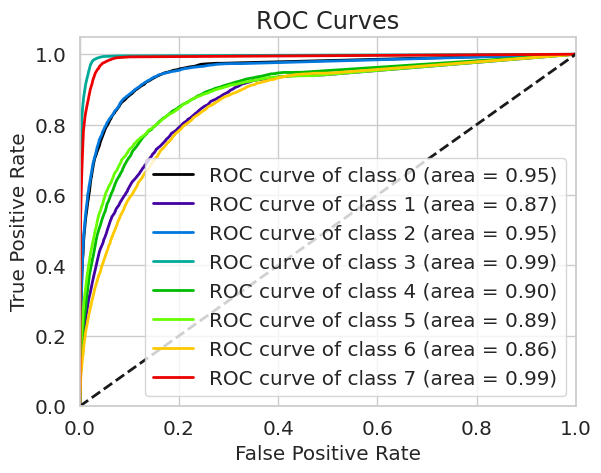

AUC Score: 0.9272034992125435


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],             # Split criterion
    'max_depth': [None, 10, 20, 30, 40],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 16],       # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider at each split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dt,
                           param_grid=param_grid,
                           cv=5,
                           verbose=3,
                           n_jobs=-1)


# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=40)
Best Score:  0.7820904256473619


Test Accuracy  0.7957588240801423
Train Accuracy  0.997085878800646
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5340
           1       0.66      0.66      0.66      5340
           2       0.86      0.86      0.86      5341
           3       0.96      0.97      0.97      5341
           4       0.74      0.75      0.74      5341
           5       0.66      0.61      0.64      5340
           6       0.67      0.66      0.66      5341
           7       0.95      0.96      0.95      5340

    accuracy                           0.80     42724
   macro avg       0.79      0.80      0.79     42724
weighted avg       0.79      0.80      0.79     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

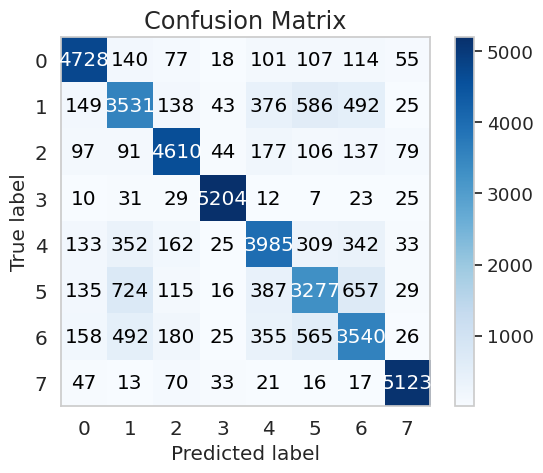

In [ ]:
# Train model with optimized parameters
from sklearn.tree import DecisionTreeClassifier

dt = grid_search.best_estimator_
dt.fit(x_train, y_train)

# Make prediction
y_pred_dt = dt.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_dt))
print('Train Accuracy ', accuracy_score(y_train, dt.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_dt))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt)

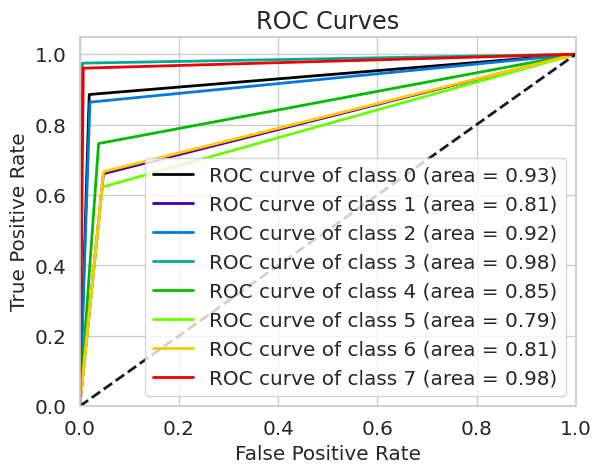

AUC Score: 0.8843338154236282


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## Random Forest Classifier

Test Accuracy  0.8394111038292295
Train Accuracy  0.9972029117805398
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5340
           1       0.75      0.72      0.73      5340
           2       0.87      0.90      0.89      5341
           3       0.96      0.99      0.97      5341
           4       0.79      0.80      0.80      5341
           5       0.73      0.68      0.70      5340
           6       0.75      0.72      0.73      5341
           7       0.95      0.98      0.96      5340

    accuracy                           0.84     42724
   macro avg       0.84      0.84      0.84     42724
weighted avg       0.84      0.84      0.84     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

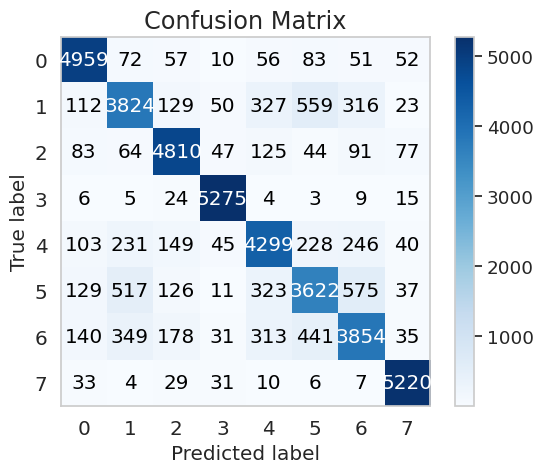

In [ ]:
# Train model with default parameters
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_rf))
print('Train Accuracy ', accuracy_score(y_train, rf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_rf))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)

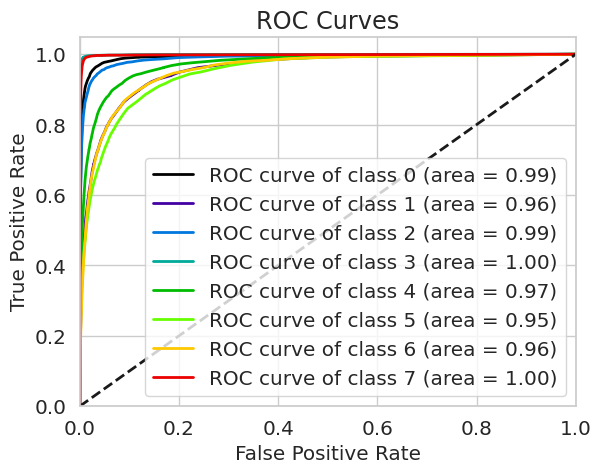

AUC Score: 0.9762080028483034


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),       # Number of trees in the forest
    'criterion': ['gini', 'entropy'],       # Split criterion
    'max_depth': randint(10, 50),           # Maximum depth of the trees
    'min_samples_split': randint(2, 20),    # Minimum samples required to split a node
    'min_samples_leaf': randint(1, 20),     # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, verbose=3, n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'criterion': 'gini', 'max_depth': 45, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 122}
Best Estimator:  RandomForestClassifier(max_depth=45, max_features='log2', min_samples_leaf=2,
                       min_samples_split=7, n_estimators=122)
Best Score:  0.809493684061505


Test Accuracy  0.8227928096620166
Train Accuracy  0.9480666151721555
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5340
           1       0.74      0.68      0.71      5340
           2       0.85      0.89      0.87      5341
           3       0.95      0.99      0.97      5341
           4       0.76      0.77      0.77      5341
           5       0.72      0.68      0.70      5340
           6       0.72      0.69      0.70      5341
           7       0.94      0.98      0.96      5340

    accuracy                           0.82     42724
   macro avg       0.82      0.82      0.82     42724
weighted avg       0.82      0.82      0.82     42724



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

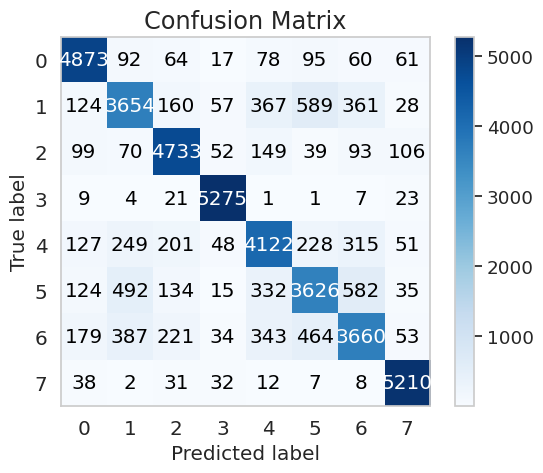

In [ ]:
# Train model with optimized parameters
from sklearn.ensemble import RandomForestClassifier

rf = random_search.best_estimator_
rf.fit(x_train,y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_rf))
print('Train Accuracy ', accuracy_score(y_train, rf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_rf))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)

#29s

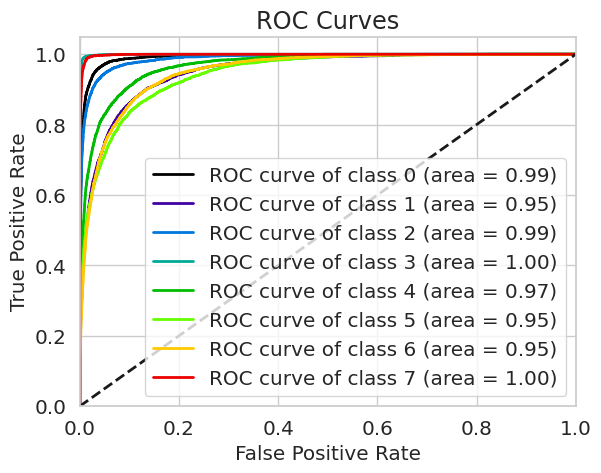

AUC Score: 0.9745359740045754


In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],   # Number of trees in the forest
    'criterion': ['gini', 'entropy'],         # Split criterion
    'max_depth': [10, 20, 30, 40, 50],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 16],    # Minimum samples required in a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)


# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


KeyboardInterrupt: ignored

In [ ]:
# Train model with optimized parameters
from sklearn.ensemble import RandomForestClassifier

rf = grid_search.best_estimator_
rf.fit(x_train,y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred_rf))
print('Train Accuracy ', accuracy_score(y_train, rf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred_rf))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

# Make prediction
y_pred = log_clf.predict(x_test)


# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, log_clf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = log_clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Create a Logistic Regression classifier
log_clf = LogisticRegression()

# Define the hyperparameter grid
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': uniform(0.1, 10.0),                       # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300, 400, 500]          # Maximum number of iterations
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(log_clf, param_distributions=param_dist, n_iter=10, cv=5, verbose=3, n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = random_search.best_estimator_
log_clf.fit(x_train,y_train)

# Make prediction
y_pred = log_clf.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, log_clf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = log_clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
log_clf = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],           # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300, 400, 500]          # Maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(log_clf, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf = grid_search.best_estimator_
log_clf.fit(x_train,y_train)

# Make prediction
y_pred = log_clf.predict(x_test)

# See training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, log_clf.predict(x_train)))

# See classification report
print(classification_report(y_test, y_pred))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = log_clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Default AdaBoost classifier
adaboost = AdaBoostClassifier()

# Train model
adaboost.fit(x_train, y_train)

# Make prediction
y_pred = adaboost.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, adaboost.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = adaboost.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### RandomizedSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 1000, 50),     # Number of base estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Learning rate
    'base_estimator': [None],  # You can specify a list of base estimators to try here
#    'algorithm': ['SAMME', 'SAMME.R']           # Algorithm for boosting
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(adaboost, param_distributions=param_dist, n_iter=10, cv=5, verbose= 3, n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Default AdaBoost classifier
adaboost = random_search.best_estimator_

# Train model
adaboost.fit(x_train, y_train)

# Make prediction
y_pred = adaboost.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, adaboost.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = adaboost.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create an AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 400],       # Number of base estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Learning rate
    'base_estimator': [None],                 # You can specify a list of base estimators to try here
    'algorithm': ['SAMME', 'SAMME.R']         # Algorithm for boosting
}

# Create a GridSearchCV object
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Default AdaBoost classifier
adaboost = grid_search.best_estimator_

# Train model
adaboost.fit(x_train, y_train)

# Make prediction
y_pred = adaboost.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, adaboost.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = adaboost.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

## XGBoost Classifier

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Make prediction
y_pred = xgb_classifier.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, xgb_classifier.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = xgb_classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 1000, 50),     # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2, 0.3],   # Step size shrinking to prevent overfitting
    'max_depth': np.arange(3, 10, 1),          # Maximum tree depth
    'min_child_weight': np.arange(1, 6, 1),    # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],         # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],    # L1 regularization term on weights
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]    # L2 regularization term on weights
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

# Fit the randomized search on your data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_)
print("Best Score: ", random_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create the XGBoost classifier
xgb_classifier = random_search.best_estimator_

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Make prediction
y_pred = xgb_classifier.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, xgb_classifier.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = xgb_classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)

### GridSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 400],     # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinking to prevent overfitting
    'max_depth': [3, 4, 5],                # Maximum tree depth
    'min_child_weight': [1, 2, 3],         # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 0.9],          # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9],   # Fraction of features used for fitting the trees
    'gamma': [0, 0.1, 0.2],                # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.001, 0.01],         # L1 regularization term on weights
    'reg_lambda': [0, 0.001, 0.01]         # L2 regularization term on weights
}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

# Fit the grid search on your data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create the XGBoost classifier
xgb_classifier = grid_search.best_estimator_

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Make prediction
y_pred = xgb_classifier.predict(x_test)

# See classification report
print(classification_report(y_test, y_pred))

# Training and testing accuracy
print('Test Accuracy ', accuracy_score(y_test, y_pred))
print('Train Accuracy ', accuracy_score(y_train, xgb_classifier.predict(x_train)))

# See confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
import scikitplot as skplt

# ROC Curve
y_probas = xgb_classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show()

# AUC score
auc_score = roc_auc_score(y_test, y_probas, multi_class='ovo')
# Print the AUC score
print("AUC Score:", auc_score)